# B_Innovative 3 classes

# SEC D
We will discuss backpropagation stuff
--->

In [4]:
import cv2
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

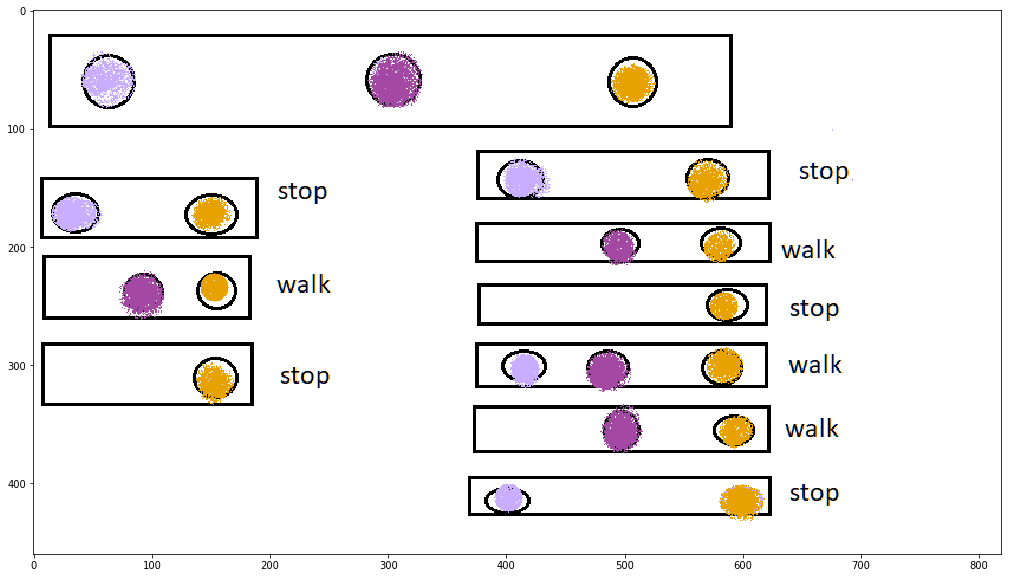

In [2]:
#So last time work single wts--->
img = cv2.imread('DATa\\secD1.png')

plt.figure(figsize=(20,10))
 ## This is your plot
plt.imshow(img)

Aso we observed that there is a perfect correlation between the middle light and whether or not it is safe to walk.
our neural netwrk will try to observe and will search for correlation.

So what we observed in supervised learning, we take a dataset of what we know and turn it into a dataset
of what we want to know. So in the above we can see we have two dataset i.e 6 observation of whether ppl walked or not.

streetlight pattern
--------------------
 1 0 1
 0 1 1
 0 0 1
 1 1 1
 0 1 1
 1 0 1
 
 
 It is a convention to give each recorded example as single row and each thing being recorded a single column(on/off state)
 
 Now we want our neural network to learn and say whether or not it is safe to cross the street or not. 
 So far we were modelling a single training input. But now we have have to train it all at once

In [11]:
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] # equals 0... i.e. "stop"

for iteration in range(40):
    error_for_all_lights = 0
    for row_index in range(len(walk_vs_stop)):
        input = streetlights[row_index]
        goal_pred = walk_vs_stop[row_index]
        pred = input.dot(weights)
        error = (goal_pred - pred)** 2
        error_for_all_lights += error
        delta = pred - goal_pred
        weights = weights - (alpha * (input * delta))	
        print("Prediction:" + str(pred))
        print("weights", weights)
    print("Error:" + str(error_for_all_lights) + "\n")

Prediction:-0.19999999999999996
weights [ 0.52  0.48 -0.68]
Prediction:-0.19999999999999996
weights [ 0.52  0.6  -0.56]
Prediction:-0.5599999999999999
weights [ 0.52   0.6   -0.504]
Prediction:0.6160000000000001
weights [ 0.5584  0.6384 -0.4656]
Prediction:0.17279999999999995
weights [ 0.5584   0.72112 -0.38288]
Prediction:0.17552
weights [ 0.540848  0.72112  -0.400432]
Error:2.6561231104

Prediction:0.14041599999999999
weights [ 0.5268064  0.72112   -0.4144736]
Prediction:0.3066464
weights [ 0.5268064   0.79045536 -0.34513824]
Prediction:-0.34513824
weights [ 0.5268064   0.79045536 -0.31062442]
Prediction:1.006637344
weights [ 0.52614267  0.78979163 -0.31128815]
Prediction:0.4785034751999999
weights [ 0.52614267  0.84194128 -0.2591385 ]
Prediction:0.26700416768
weights [ 0.49944225  0.84194128 -0.28583891]
Error:0.9628701776715985

Prediction:0.213603334144
weights [ 0.47808192  0.84194128 -0.30719925]
Prediction:0.5347420299776
weights [ 0.47808192  0.88846708 -0.26067345]
Prediction

weights [ 0.02610624  1.02499746 -0.03118156]
Prediction:0.9938158986070053
weights [ 0.02610624  1.02561587 -0.03056315]
Prediction:-0.004456911151490314
weights [ 0.02655193  1.02561587 -0.03011746]
Error:0.0018939739123713475

Prediction:-0.003565528921192253
weights [ 0.02690848  1.02561587 -0.0297609 ]
Prediction:0.9958549628928723
weights [ 0.02690848  1.02603037 -0.0293464 ]
Prediction:-0.029346400840475826
weights [ 0.02690848  1.02603037 -0.02641176]
Prediction:1.0265270918125804
weights [ 0.02425577  1.02337766 -0.02906447]
Prediction:0.9943131920358295
weights [ 0.02425577  1.02394634 -0.02849579]
Prediction:-0.004240016908292479
weights [ 0.02467977  1.02394634 -0.02807179]
Error:0.0016451096996342332

Prediction:-0.0033920135266339822
weights [ 0.02501898  1.02394634 -0.02773259]
Prediction:0.9962137566721563
weights [ 0.02501898  1.02432497 -0.02735396]
Prediction:-0.02735396176499221
weights [ 0.02501898  1.02432497 -0.02461857]
Prediction:1.0247253767906936
weights [ 0.

# Full/Batch/Stochastic gradient descent

Stochastic Gradient Descent - Updating weights one example at a time

Full Gradient Descent - Updating weights one dataset at a time

Batch Gradient Descent - Updating weights after "n" examples

--->



Bottom line is our prediction is a weighted sum of our inputs. Our learning algorithms rewards inputs that
correlate with our output with upward pressure(towards 1) on their weight while rewarding inputs with
no-correlation with downward pressure. So that our weighted sum of our inputs will find the perfect
correlation between our input and our output, by weighting de-correlated inputs to 0




Learning rewards correlation with larger weights or more generally learning finds correlation between our two datsets
---------------------------------------------------------------------------------------------------------------------

But sometimes it leads to overfitting-->\
sol is regularization
Regularization says "only weights with really strong coorelation can stay on and everything else should be silenced because its
contributing noise"
----->

# Creating our own correlation
If your data doesn't have correlation.. let's create intermediate data that does

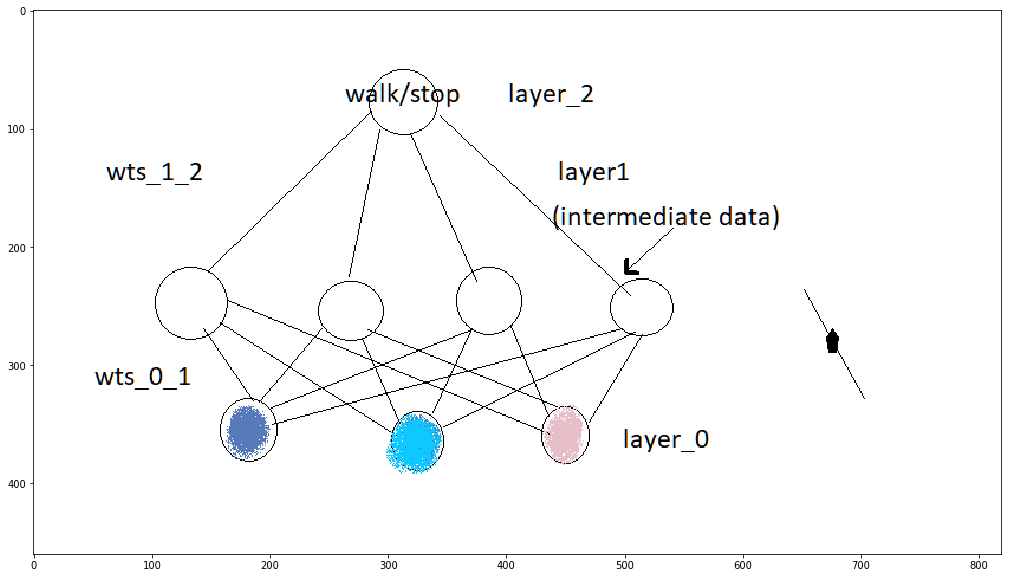

In [12]:
img = cv2.imread('DATa\\secD2.png')

plt.figure(figsize=(20,10))
 ## This is your plot
plt.imshow(img)

# Backpropagation: Long Distance Error attribution 
The process of moving delta signal around is called backpropagation

In [14]:
1*0.25*0.9

0.225

In [15]:
1*0.225

0.225


Two consecutive weighted sums is jsut more expensive version of one weighted sum
--->


In [17]:
np.random.seed(1)

def relu(x):
    return (x > 0) * x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T
    
alpha = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

for iteration in range(60):
   layer_2_error = 0
   for i in range(len(streetlights)):
      layer_0 = streetlights[i:i+1]
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = np.dot(layer_1,weights_1_2)

      layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

      layer_2_delta = (layer_2 - walk_vs_stop[i:i+1])
      layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)

      weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

   if(iteration % 10 == 9):
      print("Error:" + str(layer_2_error))

Error:0.6342311598444467
Error:0.35838407676317513
Error:0.0830183113303298
Error:0.006467054957103705
Error:0.0003292669000750734
Error:1.5055622665134859e-05



Why do deep learning matters?
-->

array([[0.42110763, 0.95788953, 0.53316528, 0.69187711, 0.31551563],
       [0.68650093, 0.83462567, 0.01828828, 0.75014431, 0.98886109],
       [0.74816565, 0.28044399, 0.78927933, 0.10322601, 0.44789353]])